In [126]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [127]:
df_IND = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

In [128]:
job_titles = df_IND['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [129]:
df_IND_top6 = df_IND[df_IND['job_title_short'].isin(job_titles)]

In [130]:
job_order=df_IND_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

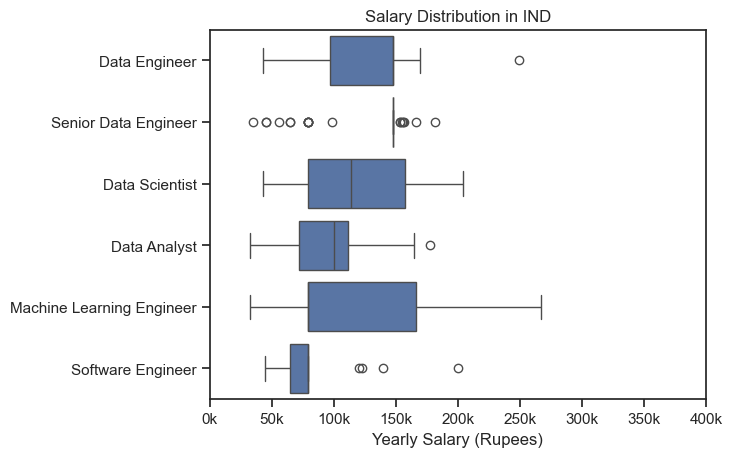

In [131]:
sns.boxplot(data=df_IND_top6,x='salary_year_avg',y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
plt.title('Salary Distribution in IND')
plt.xlabel('Yearly Salary (Rupees)')
plt.ylabel('')
plt.xlim(0,400000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


Investigate Median Salary Vs Skill for Data Analysts

In [132]:
df_DA_IND = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])

In [133]:
df_DA_IND = df_DA_IND.explode('job_skills')
df_DA_IND[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [134]:
df_DA_top_pay = df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

In [135]:
df_DA_skills = df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


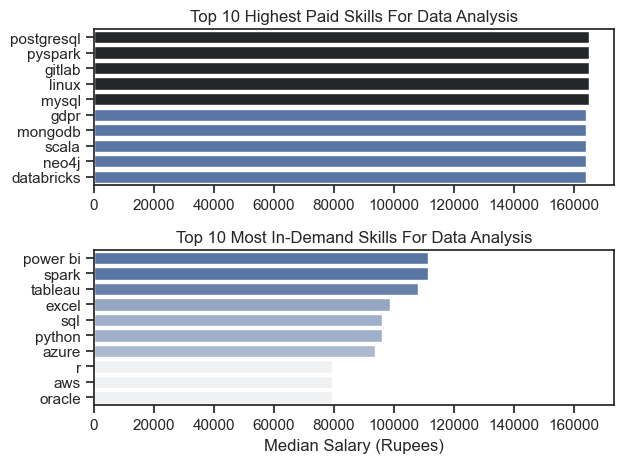

In [138]:
fig, ax=plt.subplots(2,1)
sns.set_theme(style="ticks")
sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r') #_r to reverse color
ax[0].legend().remove()
# df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
# ax[0].invert_yaxis() this or above colon method to invert
# df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills For Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (Rupees)')
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()
plt.show()